In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
# Para realizar cálculos numéricos y operaciones vectoriales
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

from scipy import optimize

# Muestra las gráficas dentro del cuaderno
%matplotlib inline

In [2]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [3]:
# importando pandas para el analisis de datos
import pandas as pd
# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

#from datetime import datetime

In [4]:
#Carga de dataset
data = pd.read_csv('Big Mart Sales.csv')

In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(data)

     ProductID  Weight FatContent  ProductVisibility         ProductType  \
0        FDW58  20.750    Low Fat           0.007565         Snack Foods   
1        FDW14   8.300        reg           0.038428               Dairy   
2        NCN55  14.600    Low Fat           0.099575              Others   
3        FDQ58   7.315    Low Fat           0.015388         Snack Foods   
4        FDY38     NaN    Regular           0.118599               Dairy   
...        ...     ...        ...                ...                 ...   
5676     FDB58  10.500    Regular           0.013496         Snack Foods   
5677     FDD47   7.600    Regular           0.142991       Starchy Foods   
5678     NCO17  10.000    Low Fat           0.073529  Health and Hygiene   
5679     FDJ26  15.300    Regular           0.000000              Canned   
5680     FDU37   9.500    Regular           0.104720              Canned   

           MRP OutletID  EstablishmentYear OutletSize LocationType  \
0     107.8622   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
# Supongamos que 'data' es tu DataFrame
columnas_eliminar = ['ProductID']
# Crea una nueva columna numérica y copia los valores de la columna categórica

# Elimina la columna categórica original
# axis indica que solo se eliminara una columna
# inplace indica que se debe modificar directamente en el data
data.drop(columnas_eliminar, axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             4705 non-null   float64
 1   FatContent         5681 non-null   object 
 2   ProductVisibility  5681 non-null   float64
 3   ProductType        5681 non-null   object 
 4   MRP                5681 non-null   float64
 5   OutletID           5681 non-null   object 
 6   EstablishmentYear  5681 non-null   int64  
 7   OutletSize         4075 non-null   object 
 8   LocationType       5681 non-null   object 
 9   OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [10]:
#variables categoricas
# con select_dtypes seleccionamos las columnas de data de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [11]:
print(columnas_categoricas)

Index(['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')


In [12]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  # se crea una instancia (se utiliza para convetir categoricos a numericos)
  le = LabelEncoder()
  # cambia de categoricos a numericos unico
  data[columna] = le.fit_transform(data[columna])

In [13]:
#resultado
print(data)

      Weight  FatContent  ProductVisibility  ProductType       MRP  OutletID  \
0     20.750           1           0.007565           13  107.8622         9   
1      8.300           4           0.038428            4   87.3198         2   
2     14.600           1           0.099575           11  241.7538         0   
3      7.315           1           0.015388           13  155.0340         2   
4        NaN           2           0.118599            4  234.2300         5   
...      ...         ...                ...          ...       ...       ...   
5676  10.500           2           0.013496           13  141.3154         8   
5677   7.600           2           0.142991           15  169.1448         3   
5678  10.000           1           0.073529            8  118.7440         7   
5679  15.300           2           0.000000            3  214.6218         2   
5680   9.500           2           0.104720            3   79.7960         7   

      EstablishmentYear  OutletSize  Lo

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             4705 non-null   float64
 1   FatContent         5681 non-null   int32  
 2   ProductVisibility  5681 non-null   float64
 3   ProductType        5681 non-null   int32  
 4   MRP                5681 non-null   float64
 5   OutletID           5681 non-null   int32  
 6   EstablishmentYear  5681 non-null   int64  
 7   OutletSize         5681 non-null   int32  
 8   LocationType       5681 non-null   int32  
 9   OutletType         5681 non-null   int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 310.8 KB


In [15]:
#llenar datos vacios
columnas_especificas = ["Weight"]
# se calcula la media de las columnas seleccionadas
media_columnas = data[columnas_especificas].mean()
# fill == llenar
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [16]:
print(media_columnas)

Weight    12.695633
dtype: float64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             5681 non-null   float64
 1   FatContent         5681 non-null   int32  
 2   ProductVisibility  5681 non-null   float64
 3   ProductType        5681 non-null   int32  
 4   MRP                5681 non-null   float64
 5   OutletID           5681 non-null   int32  
 6   EstablishmentYear  5681 non-null   int64  
 7   OutletSize         5681 non-null   int32  
 8   LocationType       5681 non-null   int32  
 9   OutletType         5681 non-null   int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 310.8 KB


In [18]:
# Define un diccionario de mapeo para los nombres en español
nombres_en_espanol = {
    'ProductID': 'Identificador de producto',
    'Weight': 'Peso',
    'FatContent': 'Contenido de grasa',
    'ProductVisibility': 'Visibilidad del producto',
    'ProductType': 'Tipo de producto',
    'MRP': 'Precio de venta al público',
    'OutletID': 'Identificador de tienda',
    'EstablishmentYear': 'Año de establecimiento',
    'OutletSize': 'Tamaño de la tienda',
    'LocationType': 'Tipo de ubicación',
    'OutletType': 'Tipo de tienda'
}

# Cambia los nombres de las columnas al español
data = data.rename(columns=nombres_en_espanol)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Peso                        5681 non-null   float64
 1   Contenido de grasa          5681 non-null   int32  
 2   Visibilidad del producto    5681 non-null   float64
 3   Tipo de producto            5681 non-null   int32  
 4   Precio de venta al público  5681 non-null   float64
 5   Identificador de tienda     5681 non-null   int32  
 6   Año de establecimiento      5681 non-null   int64  
 7   Tamaño de la tienda         5681 non-null   int32  
 8   Tipo de ubicación           5681 non-null   int32  
 9   Tipo de tienda              5681 non-null   int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 310.8 KB


In [20]:
longitud = 4269
train_long = longitud - longitud * 0.2
test_long = longitud - longitud * 0.8
print(f'Test longitud {int(np.round(test_long))}, Train longitud {int(train_long)}')

Test longitud 854, Train longitud 3415


In [21]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
train_data.to_csv("train.csv", index=False)

In [23]:
test_data.to_csv("test.csv", index=False)

In [24]:
#Carga de dataset
data = pd.read_csv('test.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Peso                        1137 non-null   float64
 1   Contenido de grasa          1137 non-null   int64  
 2   Visibilidad del producto    1137 non-null   float64
 3   Tipo de producto            1137 non-null   int64  
 4   Precio de venta al público  1137 non-null   float64
 5   Identificador de tienda     1137 non-null   int64  
 6   Año de establecimiento      1137 non-null   int64  
 7   Tamaño de la tienda         1137 non-null   int64  
 8   Tipo de ubicación           1137 non-null   int64  
 9   Tipo de tienda              1137 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 89.0 KB


In [26]:
# Lectura de Datos
# iloc accede a los datos
# x me muestra las primeras 12 columnas
columnas_seleccionadas = list(range(0, 4)) + list(range(5, 10))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 4]
m = y.size

In [27]:
print(X)
print('*'*20)
print(y)
print('*'*20)
print(m)

           Peso  Contenido de grasa  Visibilidad del producto  \
0     19.250000                   2                  0.034896   
1     12.695633                   1                  0.045198   
2      7.840000                   4                  0.153734   
3      8.575000                   2                  0.120256   
4     12.800000                   1                  0.091037   
...         ...                 ...                       ...   
1132  19.850000                   1                  0.026009   
1133  20.100000                   1                  0.000000   
1134  12.695633                   1                  0.099167   
1135  18.850000                   1                  0.055445   
1136  11.000000                   1                  0.008947   

      Tipo de producto  Identificador de tienda  Año de establecimiento  \
0                    3                        2                    2007   
1                    8                        5                    19

In [28]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [29]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

           Peso  Contenido de grasa  Visibilidad del producto  \
0     19.250000                   2                  0.034896   
1     12.695633                   1                  0.045198   
2      7.840000                   4                  0.153734   
3      8.575000                   2                  0.120256   
4     12.800000                   1                  0.091037   
...         ...                 ...                       ...   
1132  19.850000                   1                  0.026009   
1133  20.100000                   1                  0.000000   
1134  12.695633                   1                  0.099167   
1135  18.850000                   1                  0.055445   
1136  11.000000                   1                  0.008947   

      Tipo de producto  Identificador de tienda  Año de establecimiento  \
0                    3                        2                    2007   
1                    8                        5                    19

In [30]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
# np.ones(m, numero de columnas)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [31]:
print(X)

[[ 1.          1.50488716  1.00053129 ...  1.27099092 -0.09266768
  -0.21860537]
 [ 1.         -0.04310074 -0.57291833 ... -0.7978948   1.13248524
   2.29204423]
 [ 1.         -1.18988762  4.14743054 ... -0.7978948  -1.3178206
  -0.21860537]
 ...
 [ 1.         -0.04310074 -0.57291833 ... -0.7978948   1.13248524
   2.29204423]
 [ 1.          1.41041653 -0.57291833 ... -0.7978948  -1.3178206
  -0.21860537]
 [ 1.         -0.44356963 -0.57291833 ...  0.23654806 -1.3178206
  -0.21860537]]


In [32]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    # shape == devuelve el tamaño de la primera dimensión del arreglo
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # valor del costo
    J = 0

    # Se calcula la hipótesis
    h = np.dot(X, theta)

    # square == elevado
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [33]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [68]:
data = pd.read_csv('test.csv')
fila_deseada = 120

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[9.3, 1.0, 0.066783292, 5.0, 183.0292, 8.0, 1997.0, 2.0, 0.0, 1.0]


theta calculado por el descenso por el gradiente: [140.61528241   1.71056634  -1.29164153  -4.12539849   1.65944151
  -0.81789347  -4.28444531   1.65034188   2.6338463   -1.08747413]
El valor predecido es (usando el descenso por el gradiente): 135.3496


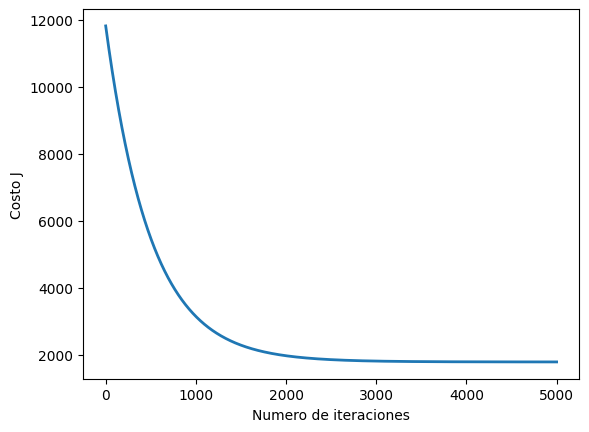

In [71]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
# 86.6856
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 9.3, 1.0, 0.066783292, 5.0, 8.0, 1997.0, 2.0, 0.0, 1.0]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))